# Sign Language Image Classification with Vision Transformers

### Dataset Preprocessing  for Vision Transformer (ViT) Model

### **Load Dataset**
   - The dataset is loaded using Keras's `image_dataset_from_directory` function.
   - Images are resized to 224x224 to match the input size of the ViT model.

### **Model and Feature Extractor Loading**:
   - The Vision Transformer model `vit-tiny-patch16` is loaded from the `transformers` library.
   - The corresponding feature extractor is also loaded to preprocess images for the model.

### **Preprocessing**:
   - A `preprocess_vit` function applies the feature extractor transformations to normalize and prepare images for the ViT model.
   - The dataset is mapped to this preprocessing function with parallelization for improved performance.

### **Dataset Splitting**:
   - The dataset is split into training (70%), validation (10%), and testing (20%) subsets.


### Install packages

In [2]:
pip install kaggle


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=2165345bf6c944bea450f116969535dd1b66030240832befdc9d81d13415d6d5
  Stored in directory: c:\users\myrto\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install torch torchvision
!pip install datasets
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install timm
!pip install tqdm


   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.2 MB 4.8 MB/s eta 0:00:06
   -- ------------------------------------- 1.8/25.2 MB 4.6 MB/s eta 0:00:06
   ---- ----------------------------------- 2.9/25.2 MB 4.7 MB/s eta 0:00:05
   ------ --------------------------------- 3.9/25.2 MB 5.0 MB/s eta 0:00:05
   ------- -------------------------------- 5.0/25.2 MB 4.9 MB/s eta 0:00:05
   --------- ------------------------------ 6.0/25.2 MB 4.9 MB/s eta 0:00:04
   ----------- ---------------------------- 7.1/25.2 MB 5.1 MB/s eta 0:00:04
   ------------- -------------------------- 8.4/25.2 MB 5.3 MB/s eta 0:00:04
   --------------- ------------------------ 10.0/25.2 MB 5.4 MB/s eta 0:00:03
   ----------------- ---------------------- 11.3/25.2 MB 5.5 MB/s eta 0:00:03
   ------------------- -------------------- 12.1/25.2 MB 5.4 MB/s eta 0:00:03
   --------------------- ------------------ 13.6/25.2 MB 5.6 MB/s eta 0:00:03
  

### Import packages

In [3]:
# Import necessary libraries
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from datasets import load_dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from timm import create_model
from tqdm import tqdm
import numpy as np


In [2]:
class CustomDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset  # Directly store the dataset (no need for split)
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Access the subset's data directly
        data = self.dataset[idx]
        image = data['image']
        label = data['label']

        if self.transform:
            image = self.transform(image)

        return image, label


## Load dataset

In [2]:
from datasets import load_dataset

# Specify the correct paths for the train and test datasets
train_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_DATASET"
test_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_TESTING_DATA"

# Load the train and test datasets separately using `imagefolder` format
train_dataset = load_dataset('imagefolder', data_dir=train_dataset_path)
test_dataset = load_dataset('imagefolder', data_dir=test_dataset_path)

# Print dataset details to verify
print("Train Dataset:", train_dataset)
print("Test Dataset:", test_dataset)


Generating train split: 11061 examples [00:00, 17710.69 examples/s]
Generating train split: 1520 examples [00:00, 13642.09 examples/s]

Train Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 11061
    })
})
Test Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1520
    })
})


In [1]:
import os
import pickle
from datasets import load_dataset

# Specify dataset paths
train_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_DATASET"
test_dataset_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_TESTING_DATA"

# Cache filenames for train and test datasets
train_cache_file = "bengali_train_dataset_cache.pkl"
test_cache_file = "bengali_test_dataset_cache.pkl"

# Load train dataset from cache or source
if os.path.exists(train_cache_file):
    print("Loading train dataset from cache...")
    with open(train_cache_file, "rb") as f:
        train_dataset = pickle.load(f)
else:
    print("Loading train dataset from source and caching it...")
    train_dataset = load_dataset('imagefolder', data_dir=train_dataset_path)
    with open(train_cache_file, "wb") as f:
        pickle.dump(train_dataset, f)

# Load test dataset from cache or source
if os.path.exists(test_cache_file):
    print("Loading test dataset from cache...")
    with open(test_cache_file, "rb") as f:
        test_dataset = pickle.load(f)
else:
    print("Loading test dataset from source and caching it...")
    test_dataset = load_dataset('imagefolder', data_dir=test_dataset_path)
    with open(test_cache_file, "wb") as f:
        pickle.dump(test_dataset, f)

# Print dataset details to verify
print("Train Dataset:", train_dataset)
print("Test Dataset:", test_dataset)


c:\Users\myrto\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading train dataset from cache...
Loading test dataset from cache...
Train Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 11061
    })
})
Test Dataset: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1520
    })
})


In [4]:
from PIL import Image

import os
from PIL import Image

# Corrected file path based on your message
file_path = r"D:\Master\DNN\sign-language-image-detection\src\ViT\sign-datasets\sign_datasets\bengali-dataset\RESIZED_TESTING_DATA\0\20180714_223926.jpg"

# Check if the file exists
if os.path.exists(file_path):
    # Open the image if it exists
    img = Image.open(file_path)
    print(f"Image dimensions: {img.size}")
else:
    print(f"File not found: {file_path}")




Image dimensions: (224, 224)


In [7]:
def calculate_mean_std(dataset):
    loader = DataLoader(dataset, batch_size=64, shuffle=False)
    mean = 0.0
    std = 0.0
    total_pixels = 0  # Total number of pixels across all images

    for images, _ in loader:
        # Number of pixels in the batch (batch_size x height x width)
        batch_pixels = images.size(0) * images.size(2) * images.size(3)
        total_pixels += batch_pixels

        # Sum of means for the batch (across channels)
        mean += images.sum(dim=[0, 2, 3])  # Sum over height and width
        # Sum of squared differences for the batch
        std += (images ** 2).sum(dim=[0, 2, 3])

    # Divide by the total number of pixels to get the mean
    mean /= total_pixels
    # Divide by the total number of pixels, then sqrt to get the std
    std = torch.sqrt(std / total_pixels - mean ** 2)
    return mean, std


In [4]:
transform_resized = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize the image to 224x224
    transforms.ToTensor(),            # Convert image to tensor
])

In [5]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx]['image']  # Access image from the dataset
        label = self.dataset[idx]['label']  # Access label from the dataset
        if self.transform:
            image = self.transform(image)  # Apply transformation to the image
        return image, label

In [8]:
# Ensure you're passing the correct split of the dataset to CustomDataset
train_split = train_dataset['train']  # Access the 'train' split of your dataset

# Create the transformed dataset
train_dataset_transformed = CustomDataset(train_split, transform=transform_resized)

# Calculate mean and std using the transformed dataset
mean, std = calculate_mean_std(train_dataset_transformed)

# Print the calculated mean and std
print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: tensor([0.6273, 0.6064, 0.5793])
Std: tensor([0.1633, 0.1924, 0.2102])


In [9]:
def calculate_num_classes(dataset):
    labels = [example['label'] for example in dataset]
    num_classes = len(set(labels))  # Get unique labels
    return num_classes

In [10]:
num_classes = calculate_num_classes(train_dataset['train'])


In [11]:
print(f"Number of classes in the dataset: {num_classes}")

Number of classes in the dataset: 38


In [17]:
# mean, std = calculate_mean_std(dataset['train'])
mean = [0.6273, 0.6064, 0.5793]
std = [0.1633, 0.1924,  0.2102]

In [7]:
print(f"Number of classes: {num_classes}")
print(f" calculated mean: {mean}")
print(f" calculated std: {std}")

Number of classes: 18
 calculated mean: [0.5778126, 0.516726, 0.48417425]
 calculated std: [0.25172076, 0.24928826, 0.24764916]


In [13]:
from torch.utils.data import random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder 
# Now, apply the normalization step after calculating mean and std
transform_norm = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize the image to 224x224
    transforms.ToTensor(),            # Convert image to tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image with calculated mean and std
])

# Apply transformation to datasets
train_dataset = ImageFolder(root=train_dataset_path, transform=transform_norm)
test_dataset = ImageFolder(root=test_dataset_path, transform=transform_norm)

# Now, split the training dataset into train and validation
total_size = len(train_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # Remaining 20% for validation

train_split, val_split = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for train, validation, and test datasets
batch_size = 64
train_loader_resized = DataLoader(train_split, batch_size=batch_size, shuffle=True)
val_loader_resized = DataLoader(val_split, batch_size=batch_size, shuffle=False)
test_loader_resized = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [23]:
for images, labels in train_loader_resized:
    print(images.shape)  # Should print [64, 3, 224, 224]
    break  # Just to check one batch

torch.Size([64, 3, 224, 224])


In [21]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to plot class distribution with enhanced visualization
def plot_class_distribution(dataset, title):
    # Count occurrences of each class
    class_counts = Counter([dataset[i][1] for i in range(len(dataset))])
    
    # Sort class labels and counts
    labels, counts = zip(*sorted(class_counts.items()))
    
    # Create a larger figure for better visibility
    plt.figure(figsize=(12, 6))  # Set figure size (adjust as needed)
    
    # Plot the distribution
    plt.bar(labels, counts, tick_label=[str(label) for label in labels], color='skyblue')
    plt.xlabel('Class Labels', fontsize=14)
    plt.ylabel('Number of Samples', fontsize=14)
    plt.title(title, fontsize=16)
    
    # Rotate tick labels for better readability if there are many classes
    plt.xticks( fontsize=12)
    
    # Increase the size of the y-axis labels and ticks for better visibility
    plt.yticks(fontsize=12)
    
    # Display the plot
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()




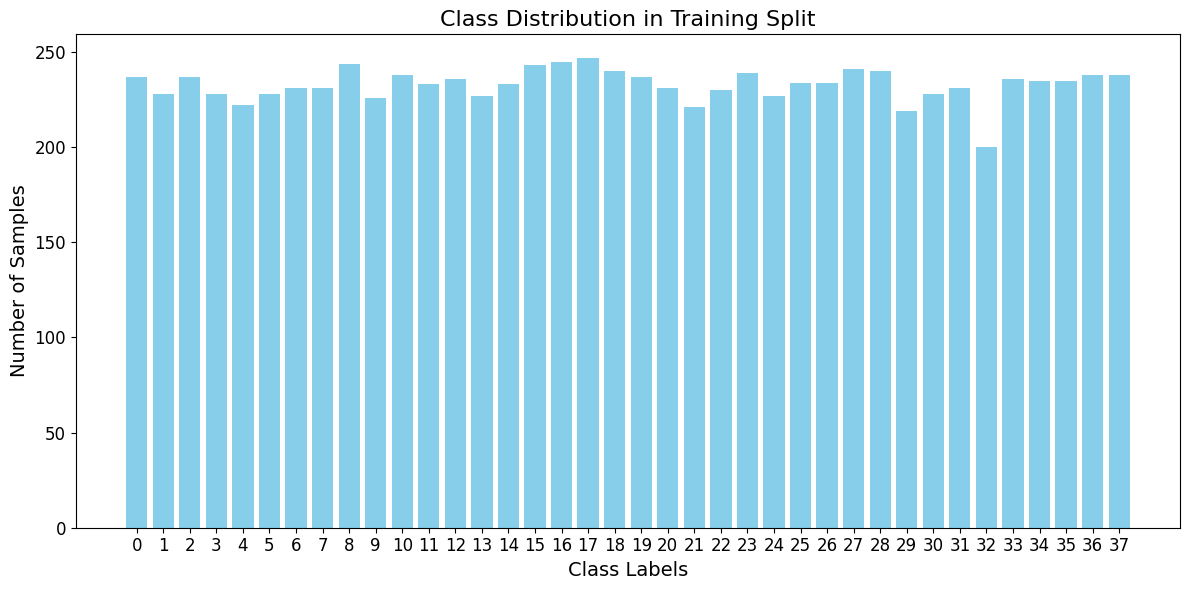

In [22]:
plot_class_distribution(train_split, "Class Distribution in Training Split")

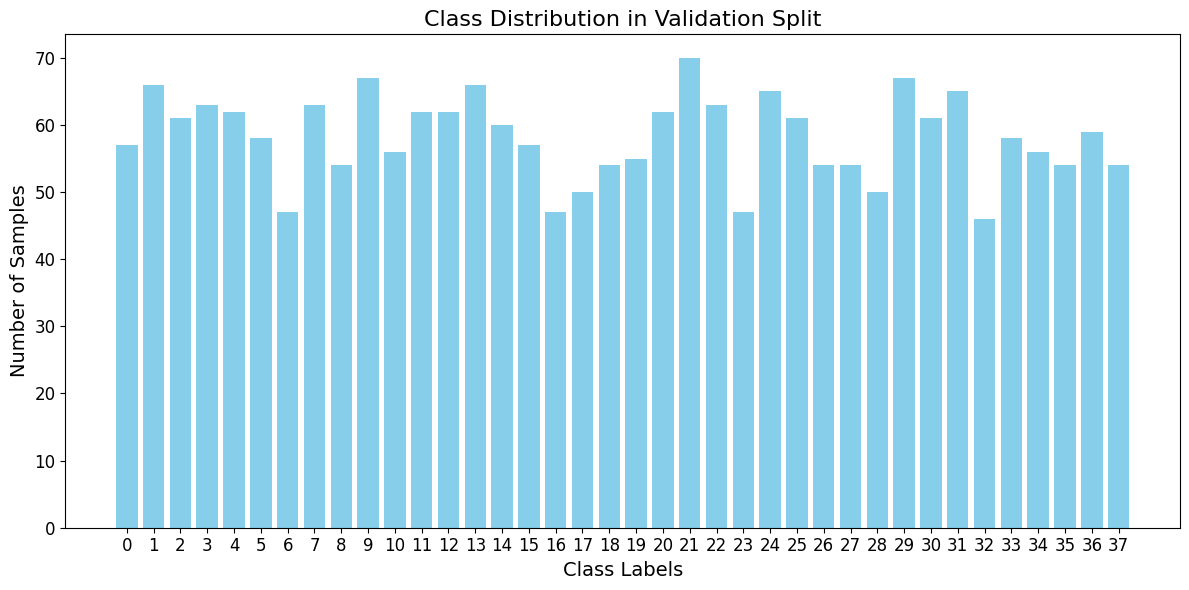

In [23]:
# Plot for validation split
plot_class_distribution(val_split, "Class Distribution in Validation Split")

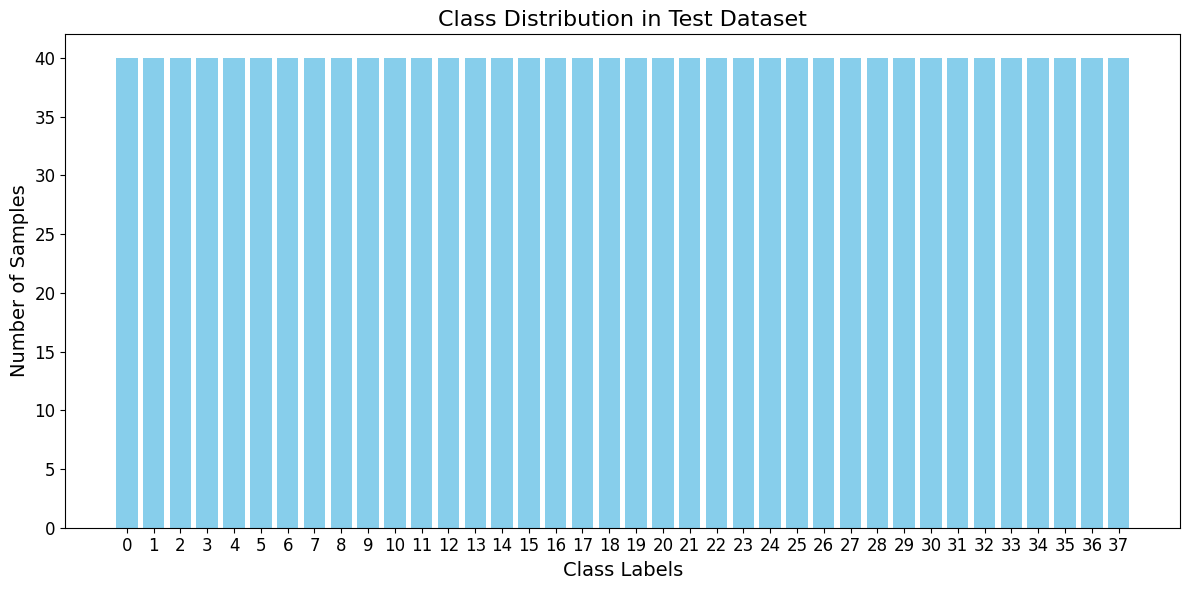

In [24]:
# Plot for test dataset
plot_class_distribution(test_dataset, "Class Distribution in Test Dataset")

### Model Training - Full Vit Training

#### Trainer Class

In [24]:
from tqdm import tqdm
import torch

class Trainer:
    def __init__(self, model, optimizer, loss_fn, device, scheduler=None):
        """
        Initialize the Trainer class.

        Args:
            model (torch.nn.Module): The model to train.
            optimizer (torch.optim.Optimizer): Optimizer for updating weights.
            loss_fn (torch.nn.Module): Loss function.
            device (torch.device): Device to run training (CPU/GPU).
            scheduler (torch.optim.lr_scheduler, optional): Learning rate scheduler. Default is None.
        """
        self.model = model.to(device)
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.device = device
        self.scheduler = scheduler  # Optional scheduler

    def train_epoch(self, train_loader):
        """Train for one epoch and return loss and accuracy."""
        self.model.train()
        total_loss = 0
        correct = 0

        with tqdm(train_loader, desc="Training", unit="batch") as t:
            for images, labels in t:
                images, labels = images.to(self.device), labels.to(self.device)
                self.optimizer.zero_grad()
                logits = self.model(images)
                loss = self.loss_fn(logits, labels)
                loss.backward()
                self.optimizer.step()

                # Track loss and correct predictions
                total_loss += loss.item() * len(images)
                predictions = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()

                t.set_postfix(loss=loss.item())
        
        # Compute average loss and accuracy
        avg_loss = total_loss / len(train_loader.dataset)
        accuracy = correct / len(train_loader.dataset)
        return avg_loss, accuracy

    @torch.no_grad()
    def evaluate(self, dataloader):
        """Evaluate the model and return loss and accuracy."""
        self.model.eval()
        total_loss = 0
        correct = 0

        with tqdm(dataloader, desc="Validating", unit="batch") as t:
            for images, labels in t:
                images, labels = images.to(self.device), labels.to(self.device)
                logits = self.model(images)
                loss = self.loss_fn(logits, labels)

                # Track loss and correct predictions
                total_loss += loss.item() * len(images)
                predictions = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()

        # Compute average loss and accuracy
        avg_loss = total_loss / len(dataloader.dataset)
        accuracy = correct / len(dataloader.dataset)
        return avg_loss, accuracy

    def get_current_lr(self):
        """Retrieve the current learning rate from the optimizer."""
        return self.optimizer.param_groups[0]['lr']

    def train(self, train_loader, val_loader, epochs):
        """Train the model and evaluate it after each epoch."""
        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []
        learning_rates = []  # Track learning rate for each epoch

        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            
            # Training phase
            train_loss, train_accuracy = self.train_epoch(train_loader)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            
            # Validation phase
            val_loss, val_accuracy = self.evaluate(val_loader)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            
            # Get the learning rate
            current_lr = self.get_current_lr()
            learning_rates.append(current_lr)
            
            # Print epoch metrics
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
            print(f"Learning Rate: {current_lr:.6f}")
            
            # Step the scheduler, if provided
            if self.scheduler:
                self.scheduler.step(val_loss)  # Use validation loss for ReduceLROnPlateau
            
            torch.cuda.empty_cache()

        return train_losses, train_accuracies, val_losses, val_accuracies, learning_rates




In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


In [34]:
from collections import Counter

# Assuming `train_dataset` contains labels
labels = [label for _, label in train_dataset]  # Extract labels
label_counts = Counter(labels)
print(label_counts)


Counter({16: 20665, 3: 20227, 13: 20146, 5: 20023, 7: 19918, 8: 19892, 1: 19838, 17: 19647, 9: 19627, 14: 19583, 0: 19561, 6: 19547, 15: 19466, 12: 19437, 4: 19397, 2: 19383, 10: 19363, 11: 19215})


In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
from timm import create_model

# Load the pre-trained ViT-Tiny model from timm
model = create_model(
    "vit_tiny_patch16_224",  # Pre-trained ViT-Tiny on ImageNet-1k
    pretrained=True,         # Load pre-trained weights
    num_classes=num_classes  # Use dynamic number of classes
)



# Unfreeze the entire model (train all layers)
for param in model.parameters():
    param.requires_grad = True

# Define optimizer with adjusted learning rate and weight decay
optimizer = optim.AdamW(
    model.parameters(), lr=2e-4, weight_decay=1e-4
)

# Define CrossEntropy loss function
loss_fn = nn.CrossEntropyLoss()


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Train the full ViT model
trainer = Trainer(model, optimizer, loss_fn, device, scheduler=None)
train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train(
    train_loader_resized, val_loader_resized, epochs=4
)

# Print learning rates for each epoch
print("Learning rates per epoch:", learning_rates)
# 6 minutes for 4 epochs


Epoch 1/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.06batch/s]


Train Loss: 1.9017, Train Accuracy: 0.4811
Validation Loss: 0.4556, Validation Accuracy: 0.8658
Learning Rate: 0.000200
Epoch 2/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.26batch/s]


Train Loss: 0.2695, Train Accuracy: 0.9203
Validation Loss: 0.3232, Validation Accuracy: 0.9019
Learning Rate: 0.000200
Epoch 3/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.12batch/s]


Train Loss: 0.1116, Train Accuracy: 0.9658
Validation Loss: 0.2871, Validation Accuracy: 0.9123
Learning Rate: 0.000200
Epoch 4/4


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.03batch/s]

Train Loss: 0.0766, Train Accuracy: 0.9773
Validation Loss: 0.2806, Validation Accuracy: 0.9218
Learning Rate: 0.000200
Learning rates per epoch: [0.0002, 0.0002, 0.0002, 0.0002]


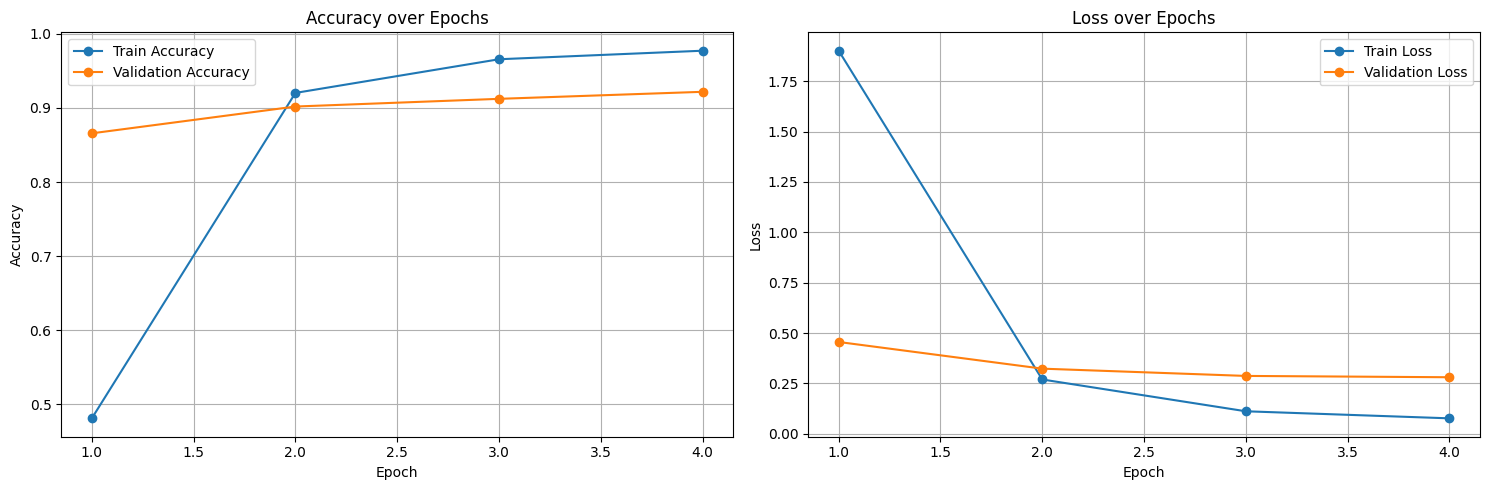

In [36]:
import matplotlib.pyplot as plt

# Create subplots: one for accuracy and one for loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot train and validation accuracy
axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label="Train Accuracy")
axes[0].plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', label="Validation Accuracy")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# Plot train and validation loss
axes[1].plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Train Loss")
axes[1].plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Validation Loss")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and true labels
y_true_classifier = []
y_pred_classifier = []
class_names = train_dataset.classes  # Automatically get class names from dataset

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in val_loader_resized:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        predictions = torch.argmax(logits, dim=1)
        y_true_classifier.extend(labels.cpu().numpy())
        y_pred_classifier.extend(predictions.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true_classifier, y_pred_classifier)





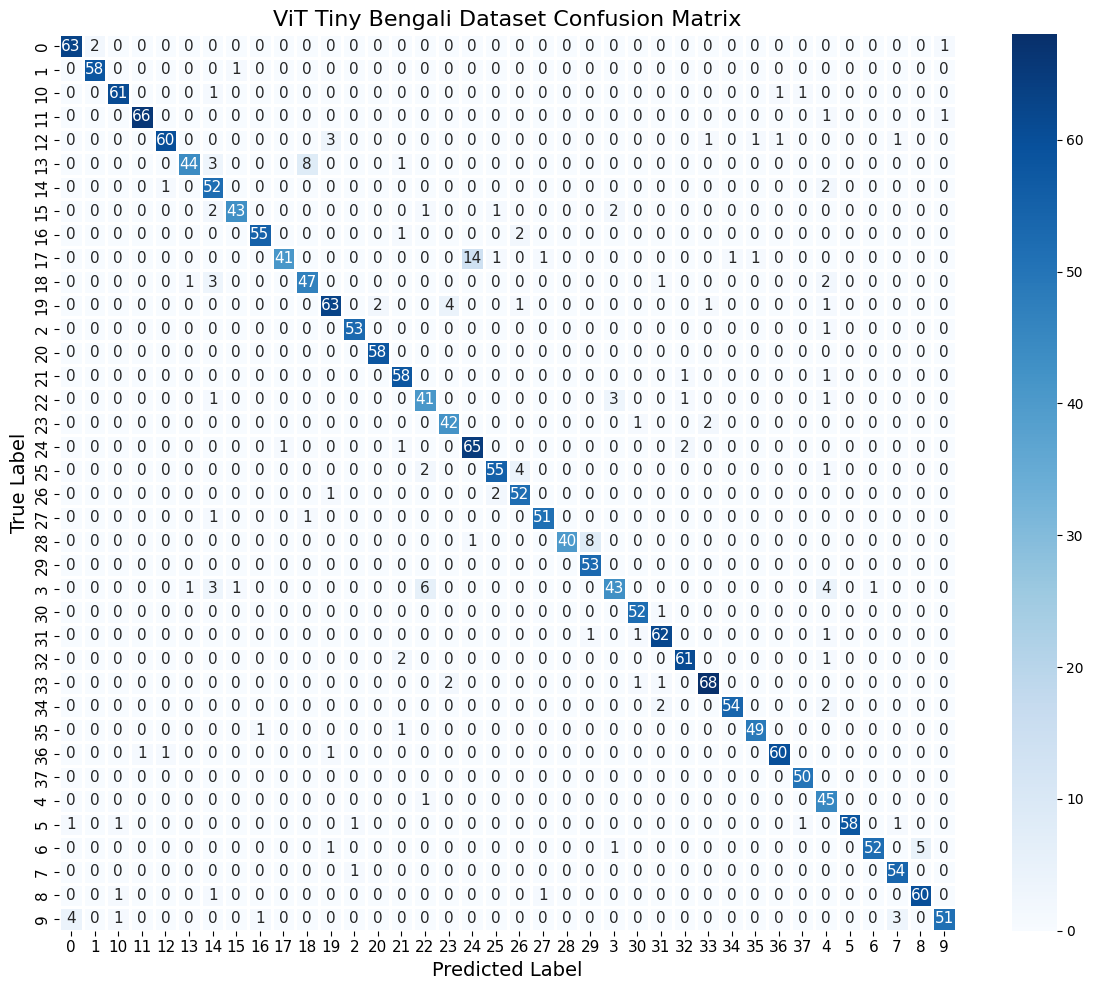

In [58]:
# Plot the confusion matrix with a larger figure size and bigger margins
plt.figure(figsize=(12, 10))  # Adjust the figsize to make the plot larger
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True,
            annot_kws={"size": 11}, linewidths=1.8)  # Increase linewidth for better visibility of borders
plt.title("ViT Tiny Bengali Dataset Confusion Matrix", fontsize=16)  # Increase font size of the title
plt.xlabel("Predicted Label", fontsize=14)  # Increase font size of the x-axis label
plt.ylabel("True Label", fontsize=14)  # Increase font size of the y-axis label
plt.xticks(fontsize=11)  # Set x-tick font size
plt.yticks(fontsize=11)

# Adjust the padding around the plot and labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)  # Adjust the plot margins
plt.tight_layout()  # Ensure everything fits nicely within the plot area
plt.show()


In [53]:
test_loss, test_accuracy = trainer.evaluate(test_loader_resized)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Validating: 100%|██████████| 24/24 [00:05<00:00,  4.16batch/s]

Test Loss: 0.3157, Test Accuracy: 0.9092


In [76]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
from timm import create_model
import torch.optim as optim

# Load the pre-trained ViT-Tiny model from timm
model = create_model(
    "vit_tiny_patch16_224",  # Pre-trained ViT-Tiny on ImageNet-1k
    pretrained=True,         # Load pre-trained weights
    num_classes=num_classes  # Use dynamic number of classes
)

# Freeze all layers except the classifier head
for param in model.parameters():
    param.requires_grad = False

# Only unfreeze the classifier head
for param in model.head.parameters():
    param.requires_grad = True


# Define optimizer with adjusted learning rate and weight decay
optimizer = optim.AdamW(
    model.parameters(), lr=1e-3, weight_decay=1e-2
)
# Define CrossEntropy loss function
loss_fn = nn.CrossEntropyLoss()


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Train only the classifier head
trainer = Trainer(model, optimizer, loss_fn, device)
train_losses, train_accuracies, val_losses, val_accuracies, learning_rates = trainer.train(
    train_loader_resized, val_loader_resized, epochs=15
)

# Print learning rates for each epoch
print("Learning rates per epoch:", learning_rates)


Epoch 1/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.26batch/s]


Train Loss: 2.5393, Train Accuracy: 0.3131
Validation Loss: 1.9358, Validation Accuracy: 0.4614
Learning Rate: 0.001000
Epoch 2/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.38batch/s]


Train Loss: 1.6669, Train Accuracy: 0.5324
Validation Loss: 1.6205, Validation Accuracy: 0.5445
Learning Rate: 0.001000
Epoch 3/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.24batch/s]


Train Loss: 1.4292, Train Accuracy: 0.5973
Validation Loss: 1.5080, Validation Accuracy: 0.5676
Learning Rate: 0.001000
Epoch 4/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.18batch/s]


Train Loss: 1.3090, Train Accuracy: 0.6247
Validation Loss: 1.4695, Validation Accuracy: 0.5685
Learning Rate: 0.001000
Epoch 5/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.43batch/s]


Train Loss: 1.2220, Train Accuracy: 0.6443
Validation Loss: 1.4288, Validation Accuracy: 0.5779
Learning Rate: 0.001000
Epoch 6/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.44batch/s]


Train Loss: 1.1688, Train Accuracy: 0.6592
Validation Loss: 1.3980, Validation Accuracy: 0.5983
Learning Rate: 0.001000
Epoch 7/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.37batch/s]


Train Loss: 1.1137, Train Accuracy: 0.6704
Validation Loss: 1.3772, Validation Accuracy: 0.5992
Learning Rate: 0.001000
Epoch 8/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.32batch/s]


Train Loss: 1.0794, Train Accuracy: 0.6794
Validation Loss: 1.3667, Validation Accuracy: 0.6051
Learning Rate: 0.001000
Epoch 9/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.30batch/s]


Train Loss: 1.0445, Train Accuracy: 0.6928
Validation Loss: 1.3370, Validation Accuracy: 0.6146
Learning Rate: 0.001000
Epoch 10/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  3.99batch/s]


Train Loss: 1.0138, Train Accuracy: 0.6993
Validation Loss: 1.3467, Validation Accuracy: 0.6159
Learning Rate: 0.001000
Epoch 11/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  3.97batch/s]


Train Loss: 0.9911, Train Accuracy: 0.7089
Validation Loss: 1.3252, Validation Accuracy: 0.6204
Learning Rate: 0.001000
Epoch 12/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.33batch/s]


Train Loss: 0.9682, Train Accuracy: 0.7125
Validation Loss: 1.3099, Validation Accuracy: 0.6240
Learning Rate: 0.001000
Epoch 13/15


Validating: 100%|██████████| 35/35 [00:08<00:00,  4.14batch/s]


Train Loss: 0.9579, Train Accuracy: 0.7134
Validation Loss: 1.3346, Validation Accuracy: 0.6082
Learning Rate: 0.001000
Epoch 14/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.41batch/s]


Train Loss: 0.9349, Train Accuracy: 0.7197
Validation Loss: 1.3120, Validation Accuracy: 0.6222
Learning Rate: 0.001000
Epoch 15/15


Validating: 100%|██████████| 35/35 [00:07<00:00,  4.45batch/s]

Train Loss: 0.9197, Train Accuracy: 0.7226
Validation Loss: 1.3257, Validation Accuracy: 0.6240
Learning Rate: 0.001000
Learning rates per epoch: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


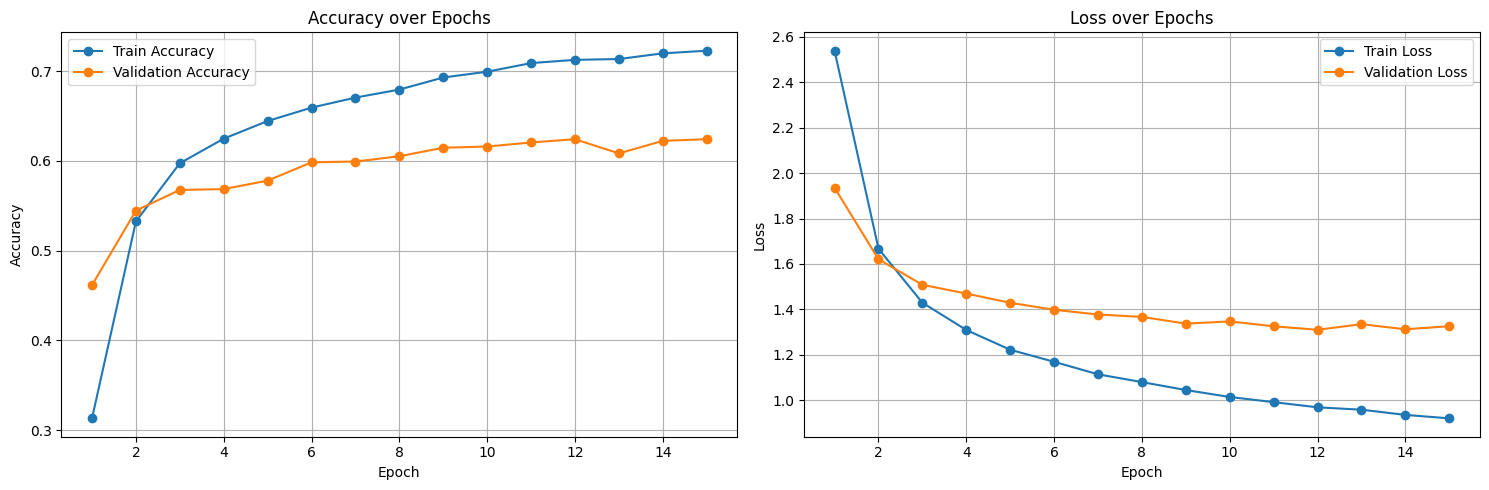

In [77]:
import matplotlib.pyplot as plt

# Create subplots: one for accuracy and one for loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot train and validation accuracy
axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label="Train Accuracy")
axes[0].plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', label="Validation Accuracy")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# Plot train and validation loss
axes[1].plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Train Loss")
axes[1].plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Validation Loss")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [78]:
# Generate predictions and true labels
y_true_classifier = []
y_pred_classifier = []
class_names = train_dataset.classes  # Automatically get class names from dataset

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in val_loader_resized:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        predictions = torch.argmax(logits, dim=1)
        y_true_classifier.extend(labels.cpu().numpy())
        y_pred_classifier.extend(predictions.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true_classifier, y_pred_classifier)


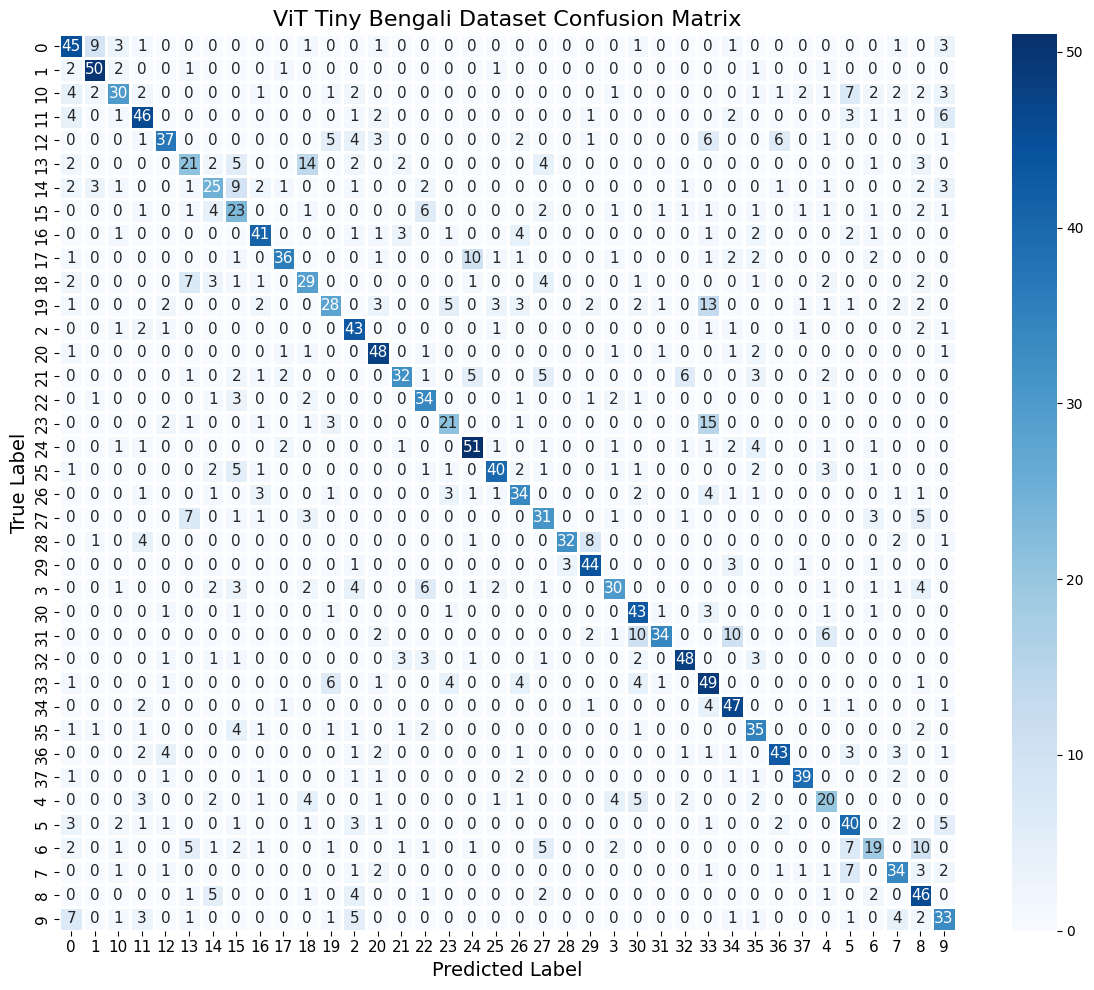

In [79]:
# Plot the confusion matrix with a larger figure size and bigger margins
plt.figure(figsize=(12, 10))  # Adjust the figsize to make the plot larger
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=True,
            annot_kws={"size": 11}, linewidths=1.8)  # Increase linewidth for better visibility of borders
plt.title("ViT Tiny Bengali Dataset Confusion Matrix", fontsize=16)  # Increase font size of the title
plt.xlabel("Predicted Label", fontsize=14)  # Increase font size of the x-axis label
plt.ylabel("True Label", fontsize=14)  # Increase font size of the y-axis label
plt.xticks(fontsize=11)  # Set x-tick font size
plt.yticks(fontsize=11)

# Adjust the padding around the plot and labels
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)  # Adjust the plot margins
plt.tight_layout()  # Ensure everything fits nicely within the plot area
plt.show()

In [80]:
test_loss, test_accuracy = trainer.evaluate(test_loader_resized)


Validating: 100%|██████████| 24/24 [00:05<00:00,  4.41batch/s]


In [81]:
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.4323, Test Accuracy: 0.5711
